<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print('Le tableau a', population.shape[1], 'colonnes')
print('-')
#La nature des données dans chacune des colonnes
print('La nature des données dans chacune des colonnes est:')
print(population.dtypes)
print('-')
#Le nombre de valeurs présentes dans chacune des colonnes
print("La colonne Zone a {} valeurs présentes".format(population['Zone'].count()))
print("La colonne Année a {} valeurs présentes".format(population['Année'].count()))
print("La colonne Valeur a {} valeurs présentes".format(population['Valeur'].count()))

Le tableau a 3 colonnes
-
La nature des données dans chacune des colonnes est:
Zone       object
Année       int64
Valeur    float64
dtype: object
-
La colonne Zone a 1416 valeurs présentes
La colonne Année a 1416 valeurs présentes
La colonne Valeur a 1416 valeurs présentes


In [5]:
#Affichage les 5 premières lignes de la table
print(population.head())

          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns = {'Valeur':'Population'}, inplace = True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head())

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
print("Le tableau a {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau a 18 colonnes


In [11]:
#Affichage les 5 premières lignes de la table
display(dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
print(dispo_alimentaire.dtypes)
print(pd.isnull(dispo_alimentaire).sum() > 0)
dispo_alimentaire = dispo_alimentaire.fillna(0)

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
variables = ['Aliments pour animaux',
             'Autres Utilisations',
             'Disponibilité intérieure', 
             'Exportations - Quantité', 
             'Importations - Quantité',
             'Nourriture',
             'Pertes',
             'Production',
             'Semences',
             'Traitement',
             'Variation de stock']
dispo_alimentaire[variables] = dispo_alimentaire[variables]*1000000

In [14]:
#Affichage les 5 premières lignes de la table
display(dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))


Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
print("Le tableau a {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau a 4 colonnes


In [17]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns = {'Pays bénéficiaire':'Zone'}, inplace = True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

          Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))


Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
print("Le tableau a {} colonnes".format(sous_nutrition.shape[1]))

Le tableau a 3 colonnes


In [23]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [28]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_sousnutrition_2017 = pd.merge(population, sous_nutrition, on='Zone')
population_sousnutrition_2017 = population_sousnutrition_2017.loc[(population_sousnutrition_2017['Année_x']==2017) & (population_sousnutrition_2017['Année_y']=='2016-2018')]

In [30]:
#Affichage du dataset
display(population_sousnutrition_2017)

,Zone,Année_x,Population,Année_y,sous_nutrition
28,Afghanistan,2017,36296113.0,2016-2018,10500000.0
64,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
100,Albanie,2017,2884169.0,2016-2018,100000.0
136,Algérie,2017,41389189.0,2016-2018,1300000.0
172,Allemagne,2017,82658409.0,2016-2018,0.0
...,...,...,...,...,...
7156,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0
7192,Viet Nam,2017,94600648.0,2016-2018,6500000.0
7228,Yémen,2017,27834819.0,2016-2018,0.0
7264,Zambie,2017,16853599.0,2016-2018,0.0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
personnes_sous_nutrition = population_sousnutrition_2017['sous_nutrition'].sum()
population_mondiale = population_sousnutrition_2017['Population'].sum()

print('Il y a', personnes_sous_nutrition, 'personnes dans le monde en état de sous nutrition.')
print('-')
print(round(((personnes_sous_nutrition/population_mondiale)*100),2), '% de la population mondiale est sous-alimentée.')

Il y a 535700000.0 personnes dans le monde en état de sous nutrition.
-
7.1 % de la population mondiale est sous-alimentée.


# <div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source => 
calories_jour = 2075.97
calories_année = calories_jour*365
print('Un être humain mange en moyenne', calories_jour, 'kcal/jour ou', round(calories_année,0), 'kcal/année')

Un être humain mange en moyenne 2075.97 kcal/jour ou 757729.0 kcal/année


Sources :
1. Appendix 2. Estimated Calorie Needs per Day, by Age, Sex, and Physical Activity Level - 2015-2020 Dietary Guidelines health.gov, https://health.gov/sites/default/files/2019-09/2015-2020_Dietary_Guidelines.pdf
    (Pour les directives caloriques, j'ai décidé d'utiliser les chiffres des personnes "Moderately Active".)
    
2. Population by Single Age - Both Sexes (XLSX, 160.91 MB), https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/2_Population/WPP2022_POP_F01_1_POPULATION_SINGLE_AGE_BOTH_SEXES.xlsx	

- J'ai regroupé les données démographiques de l'ONU pour l'année 2017 selon les groupes d'âge mentionnés dans les directives sur les calories de health.gov, puis j'ai multiplié les calories nécessaires pour chaque groupe d'âge par la population correspondante de ce groupe.
- Ensuite, j'ai additionné ces chiffres pour déterminer le nombre total de calories nécessaires chaque jour dans le monde.
- Enfin, j'ai divisé ce chiffre par la population mondiale totale afin de déterminer les calories moyennes nécessaires par personne, par jour.


In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire_population = pd.merge(dispo_alimentaire, population, on='Zone')

dispo_alimentaire_population = dispo_alimentaire_population.loc[dispo_alimentaire_population['Année']==2017]

In [34]:
#Affichage du nouveau dataframe
display(dispo_alimentaire_population)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
4,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
10,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
16,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
22,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
28,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92470,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,2017,636039.0
92476,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
92482,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
92488,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_population['dispo_kcal'] = (dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_population['Population'])*365
print('Il y a', dispo_alimentaire_population['dispo_kcal'].sum(), 'Kcal disponibles mondialement')

Il y a 7635429388975815.0 Kcal disponibles mondialement


In [36]:
#Calcul du nombre d'humains pouvant être nourris
humains_nourris= dispo_alimentaire_population['dispo_kcal'].sum()/(calories_année)

print(round(humains_nourris, 0), 'humains pouvant être nourris.')
print('-')
print('Cela équivaut à', round((humains_nourris/population_mondiale)*100, 1), '% de la population mondiale en 2017')

10076727808.0 humains pouvant être nourris.
-
Cela équivaut à 133.6 % de la population mondiale en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
#Transfert des données avec les végétaux dans un nouveau dataframe
kcal_végétaux = dispo_alimentaire_population.loc[dispo_alimentaire_population['Origine'] == 'vegetale', :]
kcal_végétaux.reset_index(drop=True)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,1.324808e+10
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,5.299232e+10
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00
11747,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00
11748,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00
11749,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.000000e+00


In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
kcal_dispo = kcal_végétaux['dispo_kcal'].sum()
print('Il y a', kcal_dispo, 'kcal disponibles mondialement venant de produits végétaux.')

Il y a 6300178937197865.0 kcal disponibles mondialement venant de produits végétaux.


In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
végétaux_humains_nourris = kcal_dispo/(2075.97*365)

print(round(végétaux_humains_nourris ,0), 'humains pouvant être nourris')
print('-')
print('Cela équivaut à', round((végétaux_humains_nourris/population_mondiale)*100, 1), '% de la population mondiale en 2017')

8314553780.0 humains pouvant être nourris
-
Cela équivaut à 110.2 % de la population mondiale en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [40]:
#Calcul de la disponibilité totale
                                   
print('La disponibilité totale est', dispo_alimentaire['Disponibilité intérieure'].sum())

La disponibilité totale est 9848994000000.0


In [41]:
Production = dispo_alimentaire['Production'].sum()
Importations = dispo_alimentaire['Importations - Quantité'].sum()
Exportations = dispo_alimentaire['Exportations - Quantité'].sum()
Variation_de_stock = dispo_alimentaire['Variation de stock'].sum()



Semences = dispo_alimentaire['Semences'].sum()
Pertes = dispo_alimentaire['Pertes'].sum()
Nourriture = dispo_alimentaire['Nourriture'].sum()
Aliments_pour_animaux = dispo_alimentaire['Aliments pour animaux'].sum()
Traitement = dispo_alimentaire['Traitement'].sum()
Autres_utilisations = dispo_alimentaire['Autres Utilisations'].sum()

print ('Disponibilité intérieure =', dispo_alimentaire['Disponibilité intérieure'].sum())
print('Production + Importations - Exportations + Variation de stock =', Production+Importations-Exportations+Variation_de_stock)
print('Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations =', Semences + Pertes + Nourriture + Aliments_pour_animaux + Traitement + Autres_utilisations)

Disponibilité intérieure = 9848994000000.0
Production + Importations - Exportations + Variation de stock = 9849173000000.0
Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations = 9858592000000.0


In [42]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
trois_col_names = ['Aliments pour animaux', 'Pertes', 'Nourriture']
total_dispo = dispo_alimentaire['Disponibilité intérieure'].sum()

for column in trois_col_names :
    print(column, ':', round((dispo_alimentaire[column].sum()/total_dispo)*100,2), '% de disponibilité mondiale')
          

Aliments pour animaux : 13.24 % de disponibilité mondiale
Pertes : 4.61 % de disponibilité mondiale
Nourriture : 49.51 % de disponibilité mondiale


In [43]:
dispo_col_names= ['Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement', 'Autres Utilisations']
sum_dispo_col_names = ((dispo_alimentaire[dispo_col_names].sum()/total_dispo)*100).reset_index()
sum_dispo_col_names = sum_dispo_col_names.rename(columns={"index":"Type de disponibilité", 0:"Pourcentage de l'alimentation totale"})
sum_dispo_col_names = round(sum_dispo_col_names.sort_values("Pourcentage de l'alimentation totale", ascending=False), 2)
display(sum_dispo_col_names)

,Type de disponibilité,Pourcentage de l'alimentation totale
2,Nourriture,49.51
4,Traitement,22.38
3,Aliments pour animaux,13.24
5,Autres Utilisations,8.78
1,Pertes,4.61
0,Semences,1.57


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure')

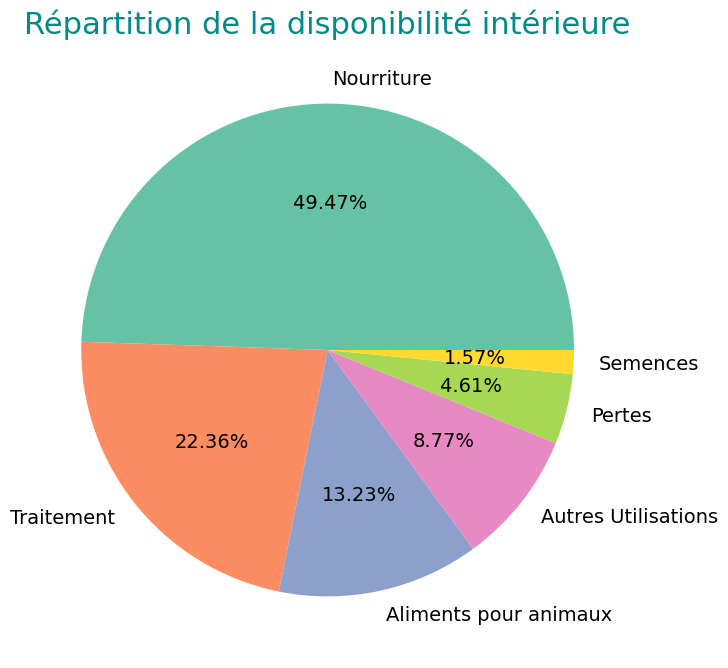

In [44]:
#Graphique circulaire des utilisations de la disponibilité intérieure
plt.figure(figsize=(12, 8))
plt.pie(x=sum_dispo_col_names["Pourcentage de l'alimentation totale"], labels=sum_dispo_col_names['Type de disponibilité'], autopct = '%.2f%%',  textprops={'fontsize': 14}, colors=sns.color_palette('Set2'))
plt.title('Répartition de la disponibilité intérieure', size=22, color='darkcyan')


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [45]:
#Création d'une liste avec toutes les variables
Produits_dispo = dispo_alimentaire['Produit'].unique()
display(Produits_dispo)


array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [46]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
céréales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge','Riz (Eq Blanchi)','Avoine','Seigle', 'Sorgho']
dispo_alimentaire_céréales=dispo_alimentaire[dispo_alimentaire['Produit'].isin(céréales)].reset_index()
display(dispo_alimentaire_céréales)

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
1,12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
2,32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
3,34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
4,40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
1493,15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
1494,15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
1495,15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


In [47]:
#Affichage de la proportion d'alimentation animale
sum_aliments_céréales_animaux = dispo_alimentaire_céréales['Aliments pour animaux'].sum()
total_céréales_dispo = dispo_alimentaire_céréales['Disponibilité intérieure'].sum()
print("La proportion d'alimentation animale est de", round((sum_aliments_céréales_animaux/total_céréales_dispo)*100,2), '%')

La proportion d'alimentation animale est de 36.29 %


In [48]:
animaux_list = ['Produit', 'Aliments pour animaux']
animaux_céréales = dispo_alimentaire_céréales[animaux_list]
animaux_céréales = animaux_céréales.groupby('Produit').sum().reset_index()
animaux_céréales['proportion'] = round((animaux_céréales['Aliments pour animaux']/sum_aliments_céréales_animaux)*100,2)

In [49]:
animaux_céréales_sorted = animaux_céréales.sort_values('proportion', ascending=False)

In [50]:
animaux_céréales_sorted

,Produit,Aliments pour animaux,proportion
3,Maïs,5.461160e+11,62.52
1,Blé,1.296680e+11,14.84
5,Orge,9.265800e+10,10.61
6,Riz (Eq Blanchi),3.359400e+10,3.85
8,Sorgho,2.480800e+10,2.84
2,"Céréales, Autres",1.903500e+10,2.18
0,Avoine,1.625100e+10,1.86
7,Seigle,8.099000e+09,0.93
4,Millet,3.306000e+09,0.38


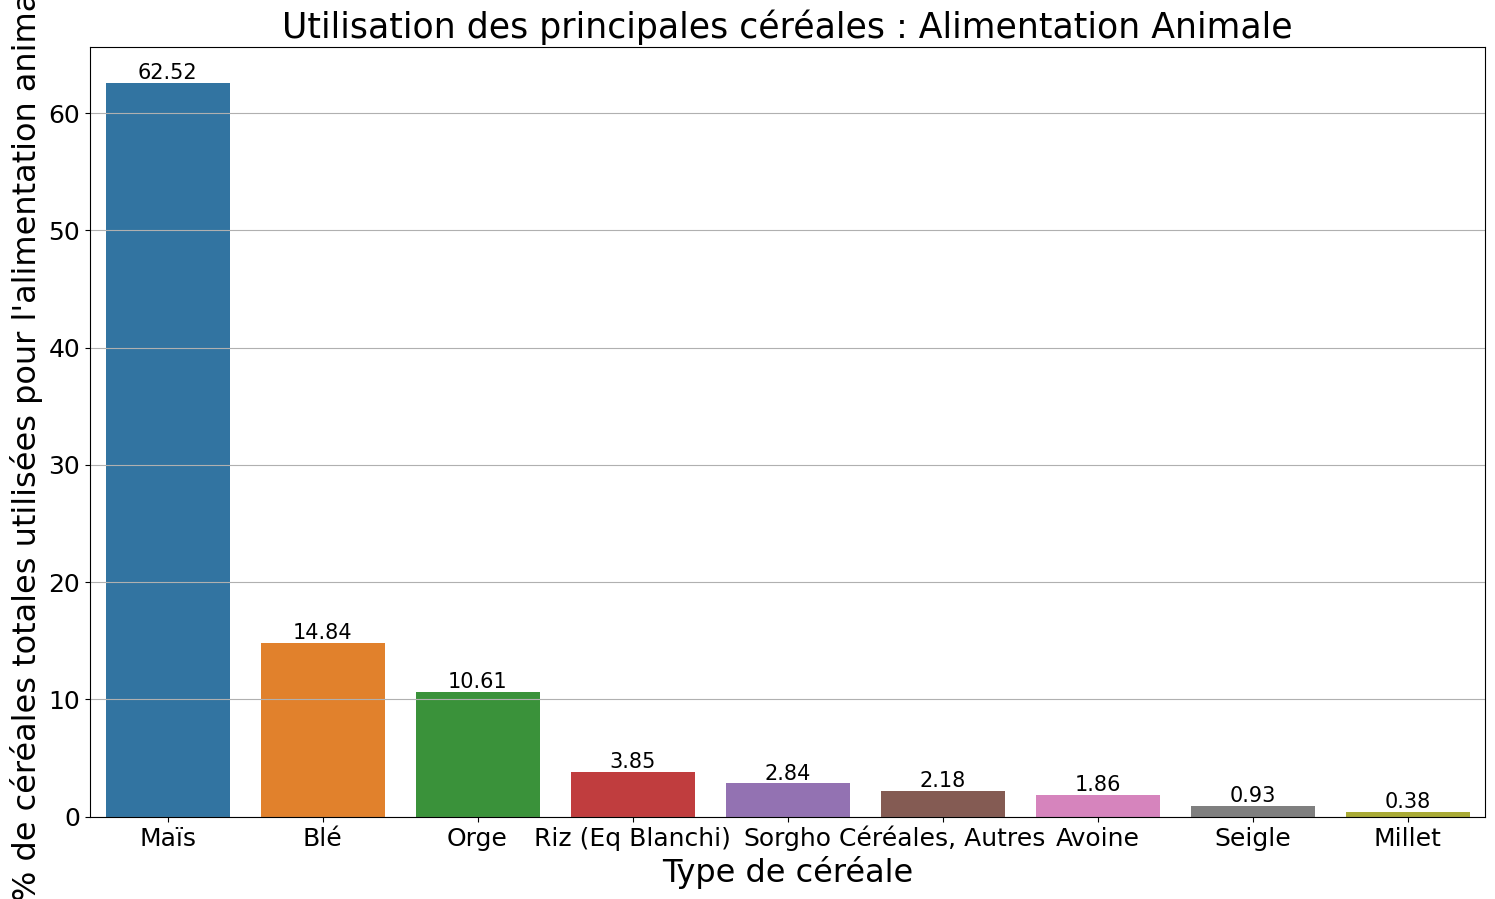

In [51]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(18, 10))
graph_animaux_céréales = sns.barplot(data=animaux_céréales_sorted, x="Produit", y='proportion', errorbar=None, estimator=sum)
plt.title('Utilisation des principales céréales : Alimentation Animale', size=25)
plt.xlabel('Type de céréale', size=23)
plt.xticks(fontsize=18)
plt.ylabel("% de céréales totales utilisées pour l'alimentation animale", size=23)
plt.yticks(fontsize=18)
plt.grid(axis='y')
sns.set_palette('Set2')

for i in graph_animaux_céréales.containers:
    graph_animaux_céréales.bar_label(i, fontsize=15)

In [52]:
#Affichage de la proportion d'alimentation humaine
nourriture_dispo = dispo_alimentaire_céréales['Nourriture'].sum()
print("La proportion d'alimentation humaine est de", round((nourriture_dispo/total_céréales_dispo)*100,2), '%')

La proportion d'alimentation humaine est de 42.75 %


In [53]:
alimentation_list = ['Produit', 'Nourriture']
alimentation_céréales = dispo_alimentaire_céréales[alimentation_list]
alimentation_céréales = alimentation_céréales.groupby('Produit').sum().reset_index()
alimentation_céréales['proportion'] = round((alimentation_céréales['Nourriture']/nourriture_dispo)*100,2)
display(alimentation_céréales)

,Produit,Nourriture,proportion
0,Avoine,3.903000e+09,0.38
1,Blé,4.578240e+11,44.49
2,"Céréales, Autres",5.324000e+09,0.52
3,Maïs,1.251840e+11,12.17
4,Millet,2.304000e+10,2.24
5,Orge,6.794000e+09,0.66
6,Riz (Eq Blanchi),3.772860e+11,36.66
7,Seigle,5.502000e+09,0.53
8,Sorgho,2.415300e+10,2.35


In [54]:
alimentation_céréales_sorted = alimentation_céréales.sort_values('proportion', ascending=False)

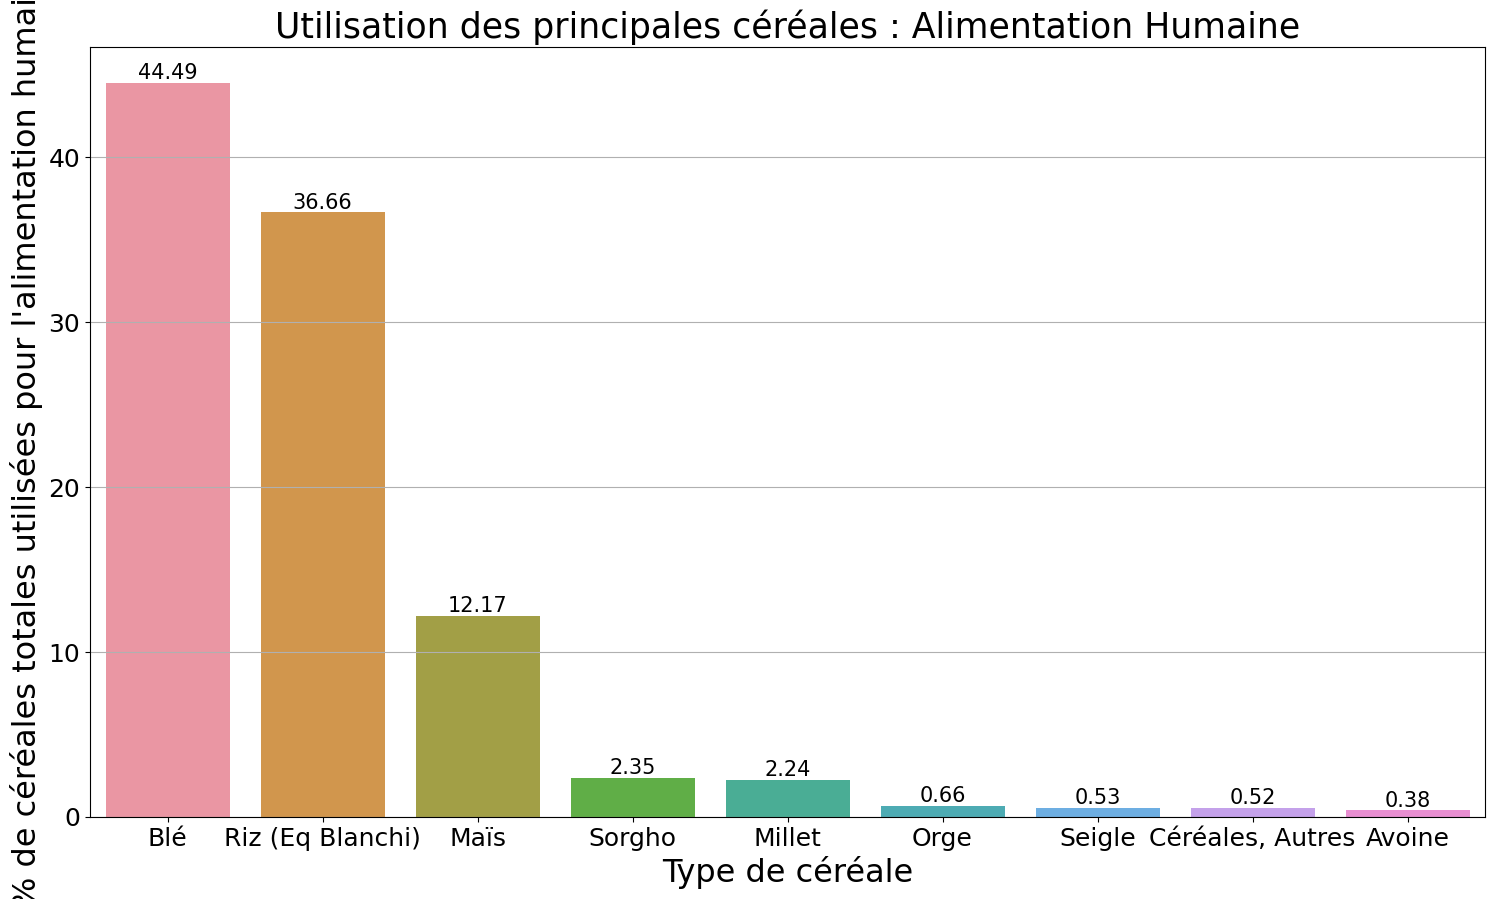

In [55]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(18, 10))
graph_alimentation_céréales = sns.barplot(data=alimentation_céréales_sorted, x="Produit", y='proportion', errorbar=None, estimator=sum)
plt.title('Utilisation des principales céréales : Alimentation Humaine', size=25)
plt.xlabel("Type de céréale", size=23)
plt.xticks(fontsize=18)
plt.ylabel("% de céréales totales utilisées pour l'alimentation humaine", size=23)
plt.yticks(fontsize=18)
plt.grid(axis='y')
sns.set_palette('Set2')

for i in graph_alimentation_céréales.containers:
    graph_alimentation_céréales.bar_label(i, fontsize=15)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [56]:
#Création de la colonne proportion par pays
population_sousnutrition_2017['pourcentage_sousnutrition'] = (population_sousnutrition_2017['sous_nutrition']/population_sousnutrition_2017['Population'])*100

In [57]:
#affichage après trie des 10 pires pays
sous_nutrition_sorted = population_sousnutrition_2017.sort_values('pourcentage_sousnutrition', ascending=False)
sous_nutrition_sorted.reset_index()
sous_nutrition_list = ['Zone', 'pourcentage_sousnutrition']
sous_nutrition_pire_10 = sous_nutrition_sorted[sous_nutrition_list].head(10)
sous_nutrition_pire_10['pourcentage_sousnutrition'] = round(sous_nutrition_pire_10['pourcentage_sousnutrition'], 2)
display(sous_nutrition_pire_10)

,Zone,pourcentage_sousnutrition
2836,Haïti,48.26
5680,République populaire démocratique de Corée,47.19
3916,Madagascar,41.06
3736,Libéria,38.28
3628,Lesotho,38.25
6616,Tchad,37.96
5824,Rwanda,35.06
4384,Mozambique,32.81
6724,Timor-Leste,32.17
28,Afghanistan,28.93


C:\Users\floss\AppData\Local\Temp\ipykernel_22996\2115261175.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph_nutrition_pire = sns.barplot(data=sous_nutrition_pire_10, x='pourcentage_sousnutrition', y="Zone", orient='h', ci=None, estimator=sum)


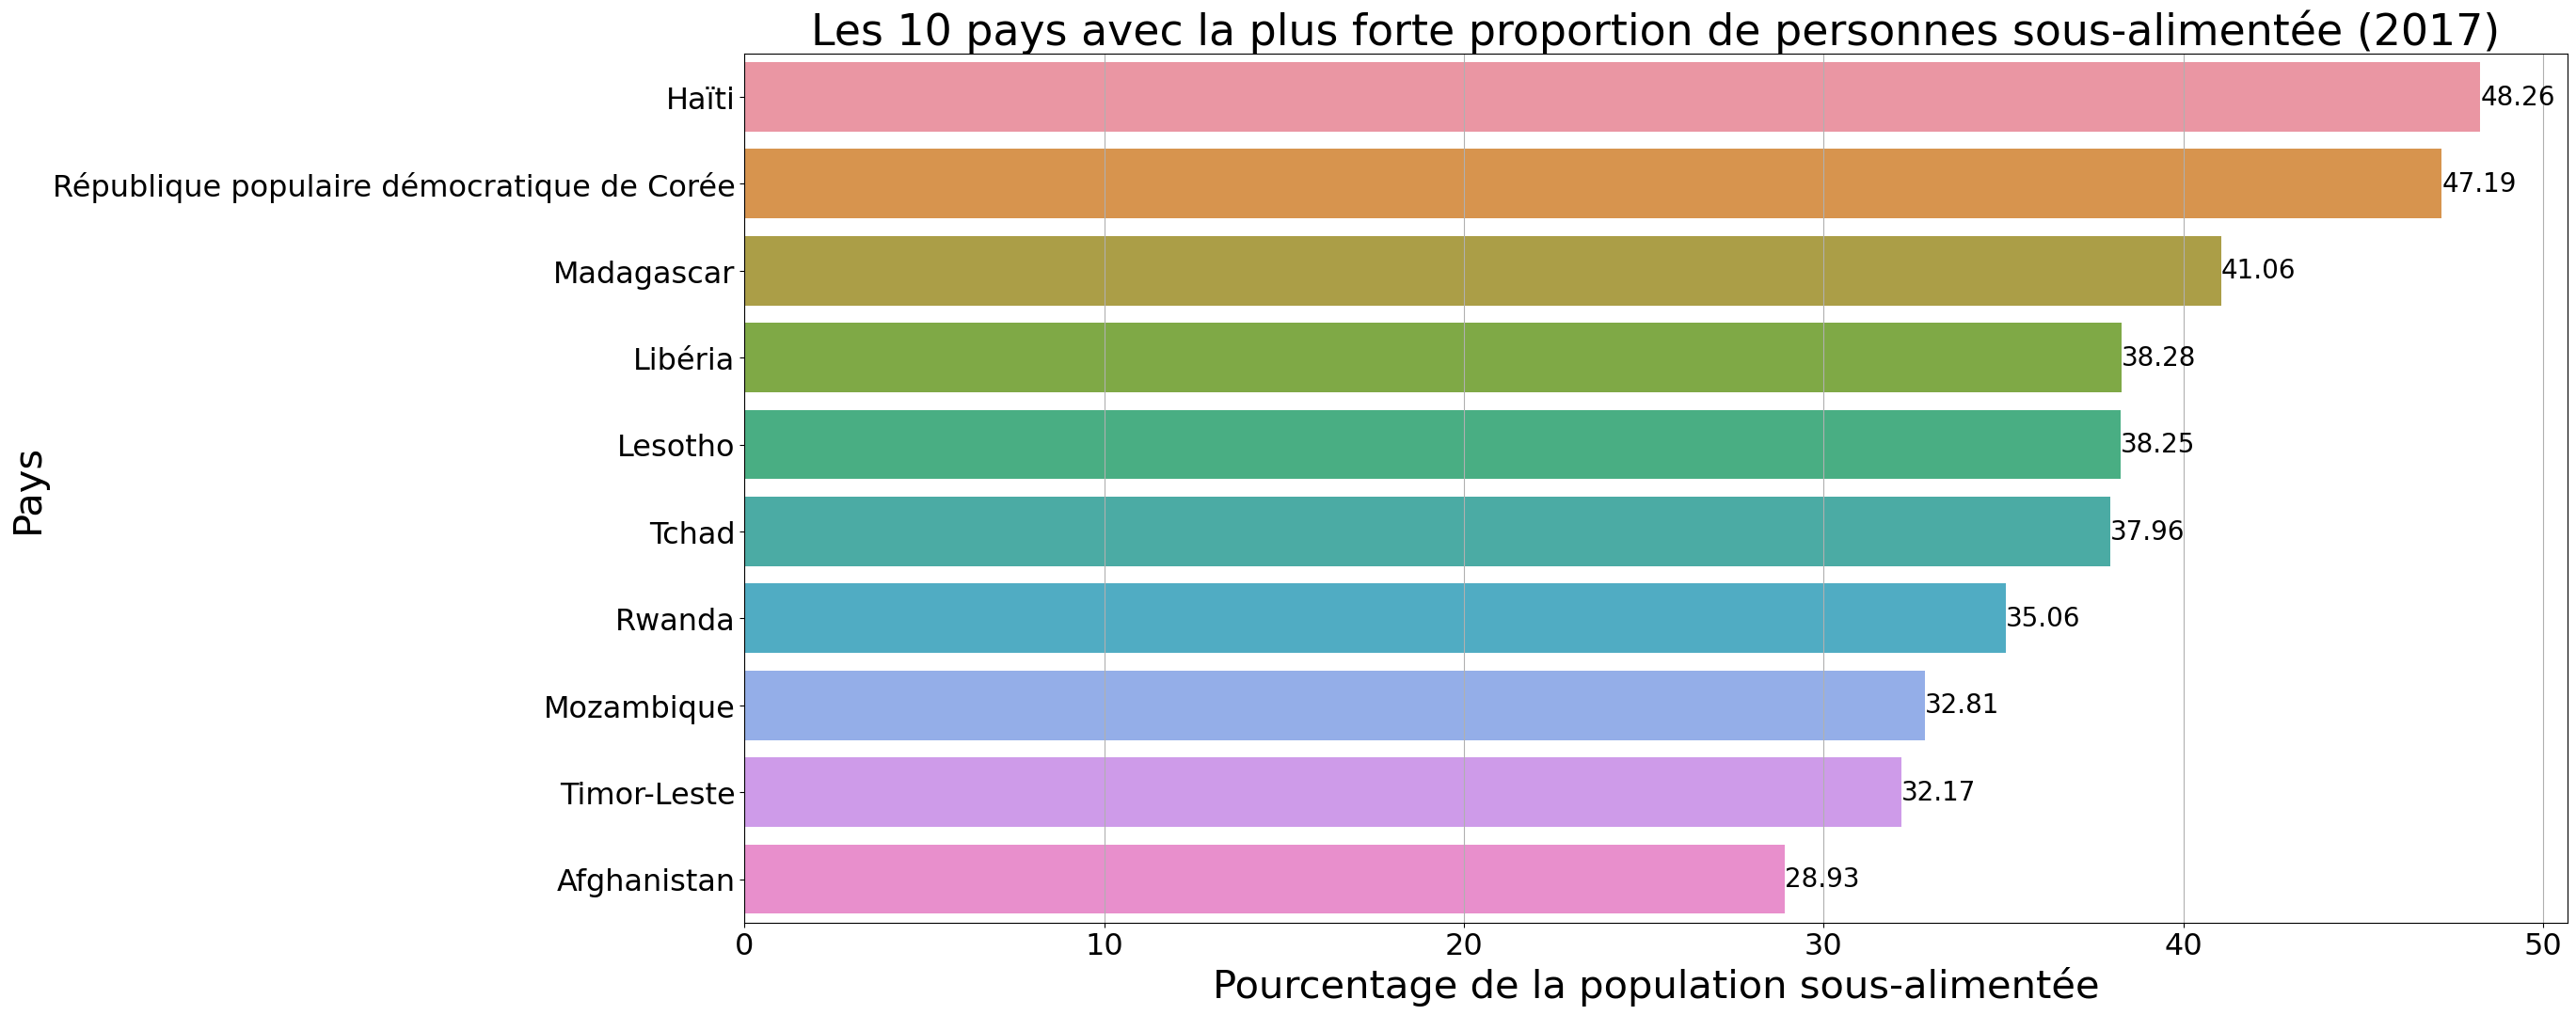

In [58]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(25, 12))
graph_nutrition_pire = sns.barplot(data=sous_nutrition_pire_10, x='pourcentage_sousnutrition', y="Zone", orient='h', ci=None, estimator=sum)
plt.title('Les 10 pays avec la plus forte proportion de personnes sous-alimentée (2017)', size=33)
plt.xlabel("Pourcentage de la population sous-alimentée", size=30)
plt.xticks(fontsize=23)
plt.ylabel('Pays', size=30)
plt.yticks(fontsize=23)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_nutrition_pire.containers:
    graph_nutrition_pire.bar_label(i, fontsize=20)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [59]:
#calcul du total de l'aide alimentaire par pays
pays_aide_liste = ['Zone', 'Valeur']
pays_aide = aide_alimentaire.groupby('Zone')[pays_aide_liste].sum()
display(pays_aide)

C:\Users\floss\AppData\Local\Temp\ipykernel_22996\1248149670.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pays_aide = aide_alimentaire.groupby('Zone')[pays_aide_liste].sum()


,Valeur
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000
...,...
Zambie,3026000
Zimbabwe,62570000
Égypte,1122000


In [60]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_bénéficie = pays_aide.sort_values('Valeur', ascending=False).head(10).reset_index()
pays_bénéficie['Valeur'] = pays_bénéficie['Valeur']/1000000

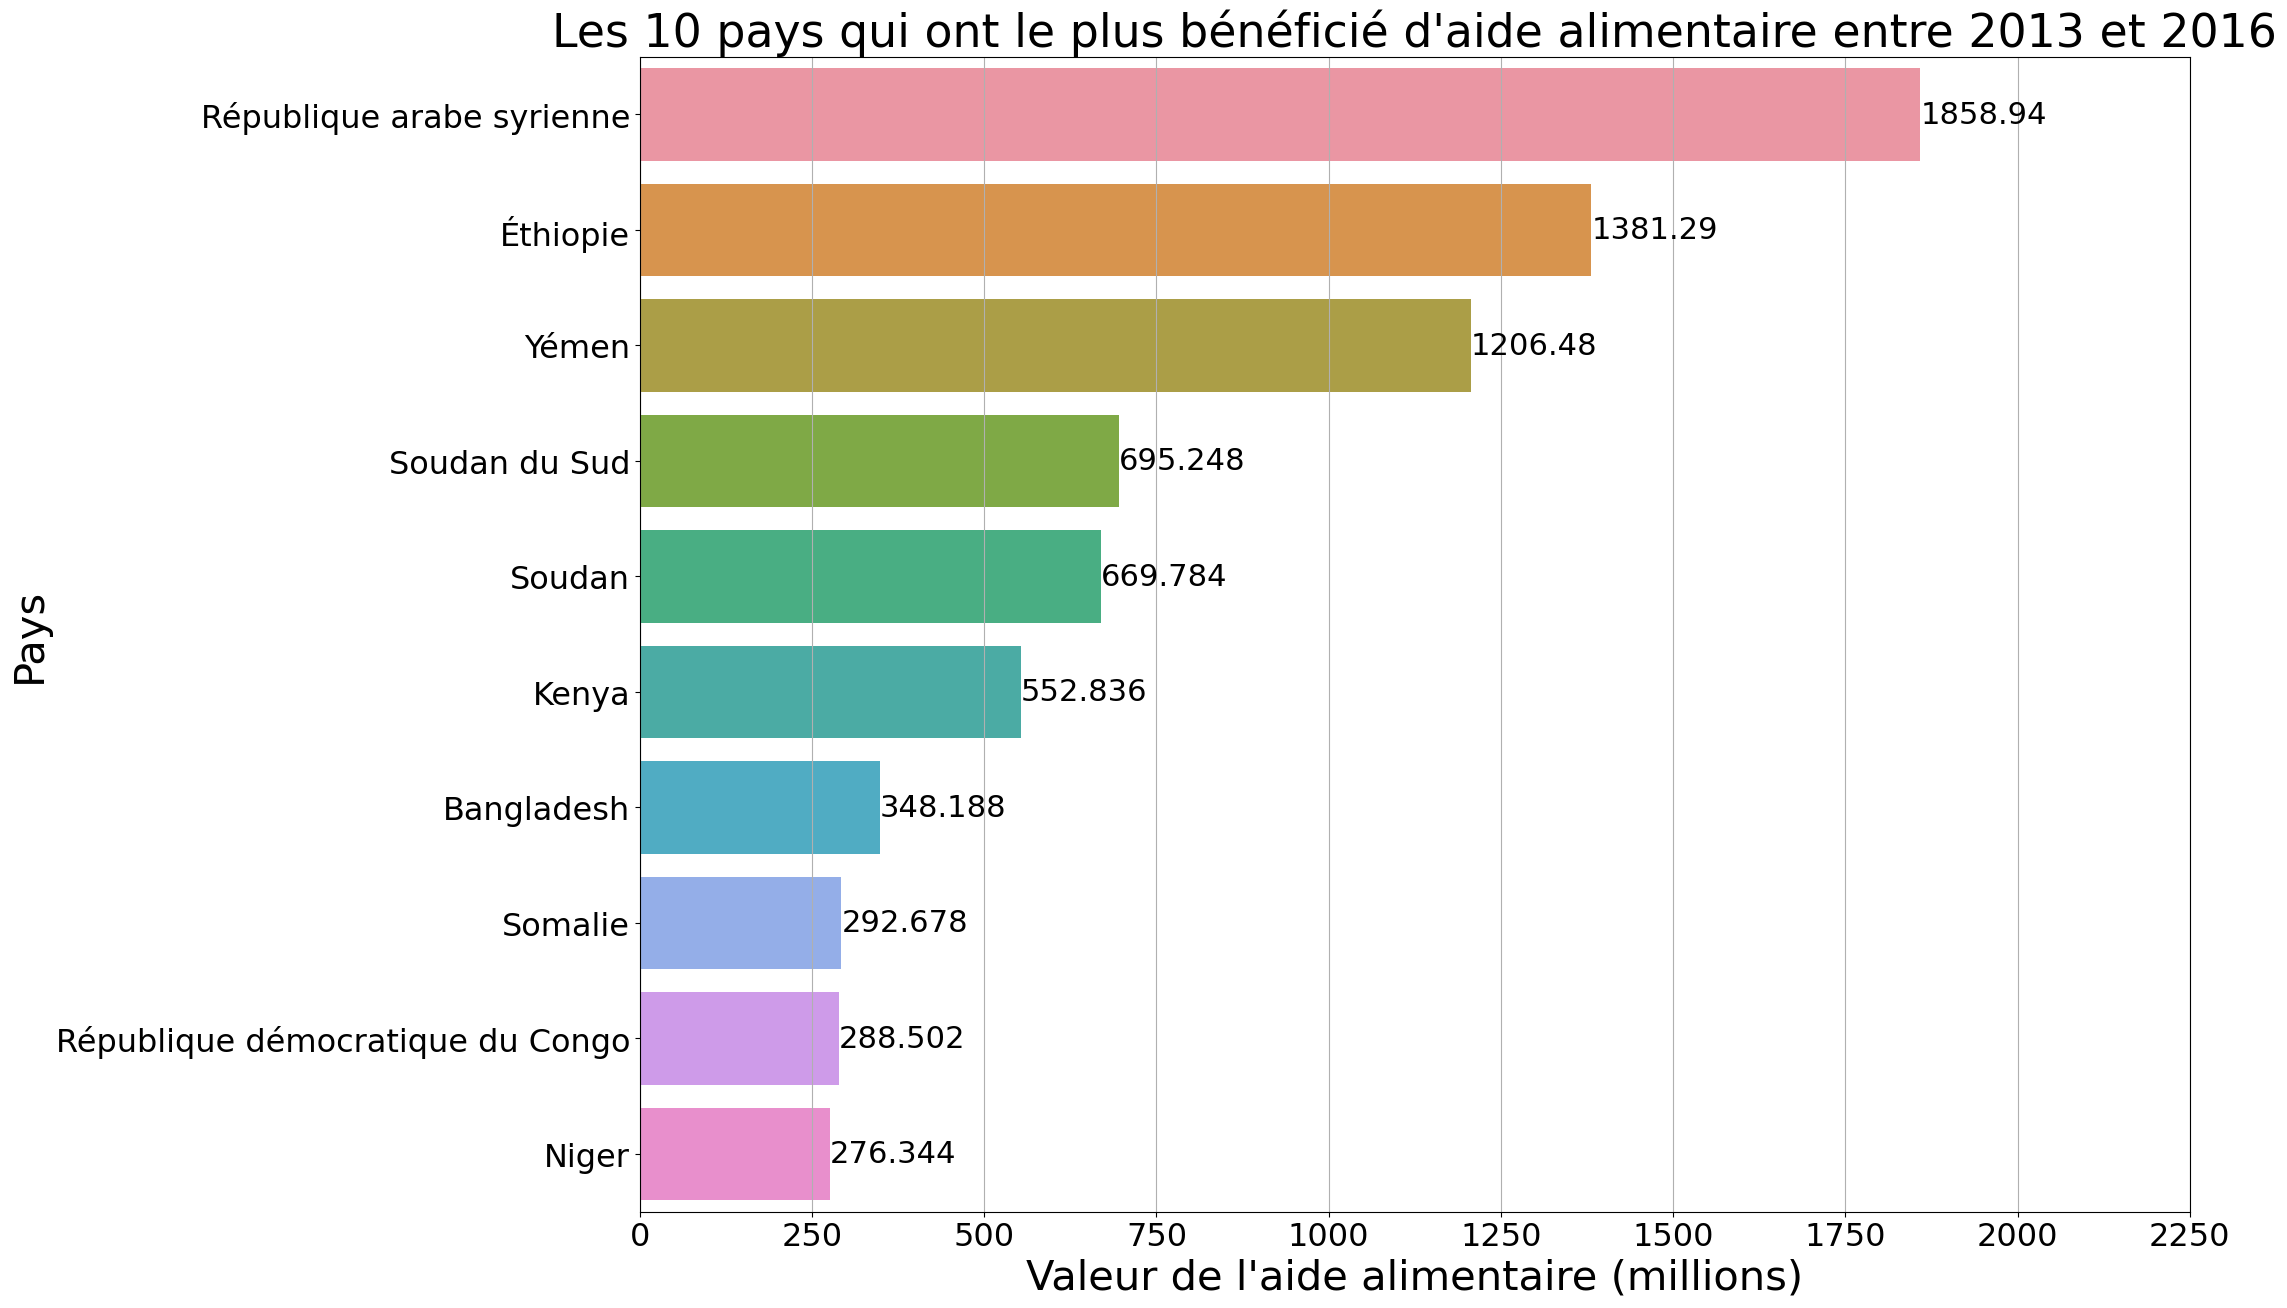

In [61]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(20, 15))
graph_plus_bénéficie = sns.barplot(data=pays_bénéficie, x='Valeur', y="Zone", errorbar=None, estimator=sum, orient='h')
plt.title("Les 10 pays qui ont le plus bénéficié d'aide alimentaire entre 2013 et 2016", size=33)
plt.xlabel("Valeur de l'aide alimentaire (millions)", size=30)
plt.xlim(0, 2000)
plt.xticks(fontsize=23)
plt.ylabel('Pays', size=30)
plt.yticks(fontsize=23)
plt.xlim(0,2250)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_plus_bénéficie.containers:
    graph_plus_bénéficie.bar_label(i, fontsize=22)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [62]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
benefits_2013_2016 = aide_alimentaire.drop(columns = 'Produit')

benefits_2013_2016_années  = benefits_2013_2016.groupby(['Zone', 'Année']).sum().reset_index()

display(benefits_2013_2016_années)

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [63]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
cinq_pays = benefits_2013_2016_années.sort_values('Valeur', ascending=False)
cinq_pays_unique= cinq_pays['Zone'].unique()
cinq_pays_list = list(cinq_pays_unique)
cinq_pays_list1 = cinq_pays_list[:5]

In [64]:
#On filtre sur le dataframe avec notre liste
benefits_2013_2016_années_cinq_pays = benefits_2013_2016_années[benefits_2013_2016_années['Zone'].isin(cinq_pays_list1)].reset_index()
benefits_2013_2016_années_cinq_pays['Valeur']=round(benefits_2013_2016_années_cinq_pays['Valeur']/1000000, 2)
benefits_2013_2016_années_cinq_pays = benefits_2013_2016_années_cinq_pays.rename(columns={'Valeur':'Valeur (millions)'})

In [65]:
# Affichage des pays avec l'aide alimentaire par année
display(benefits_2013_2016_années_cinq_pays)


,index,Zone,Année,Valeur (millions)
0,157,République arabe syrienne,2013,563.57
1,158,République arabe syrienne,2014,651.87
2,159,République arabe syrienne,2015,524.95
3,160,République arabe syrienne,2016,118.56
4,189,Soudan,2013,330.23
5,190,Soudan,2014,321.90
6,191,Soudan,2015,17.65
7,192,Soudan du Sud,2013,196.33
8,193,Soudan du Sud,2014,450.61
9,194,Soudan du Sud,2015,48.31


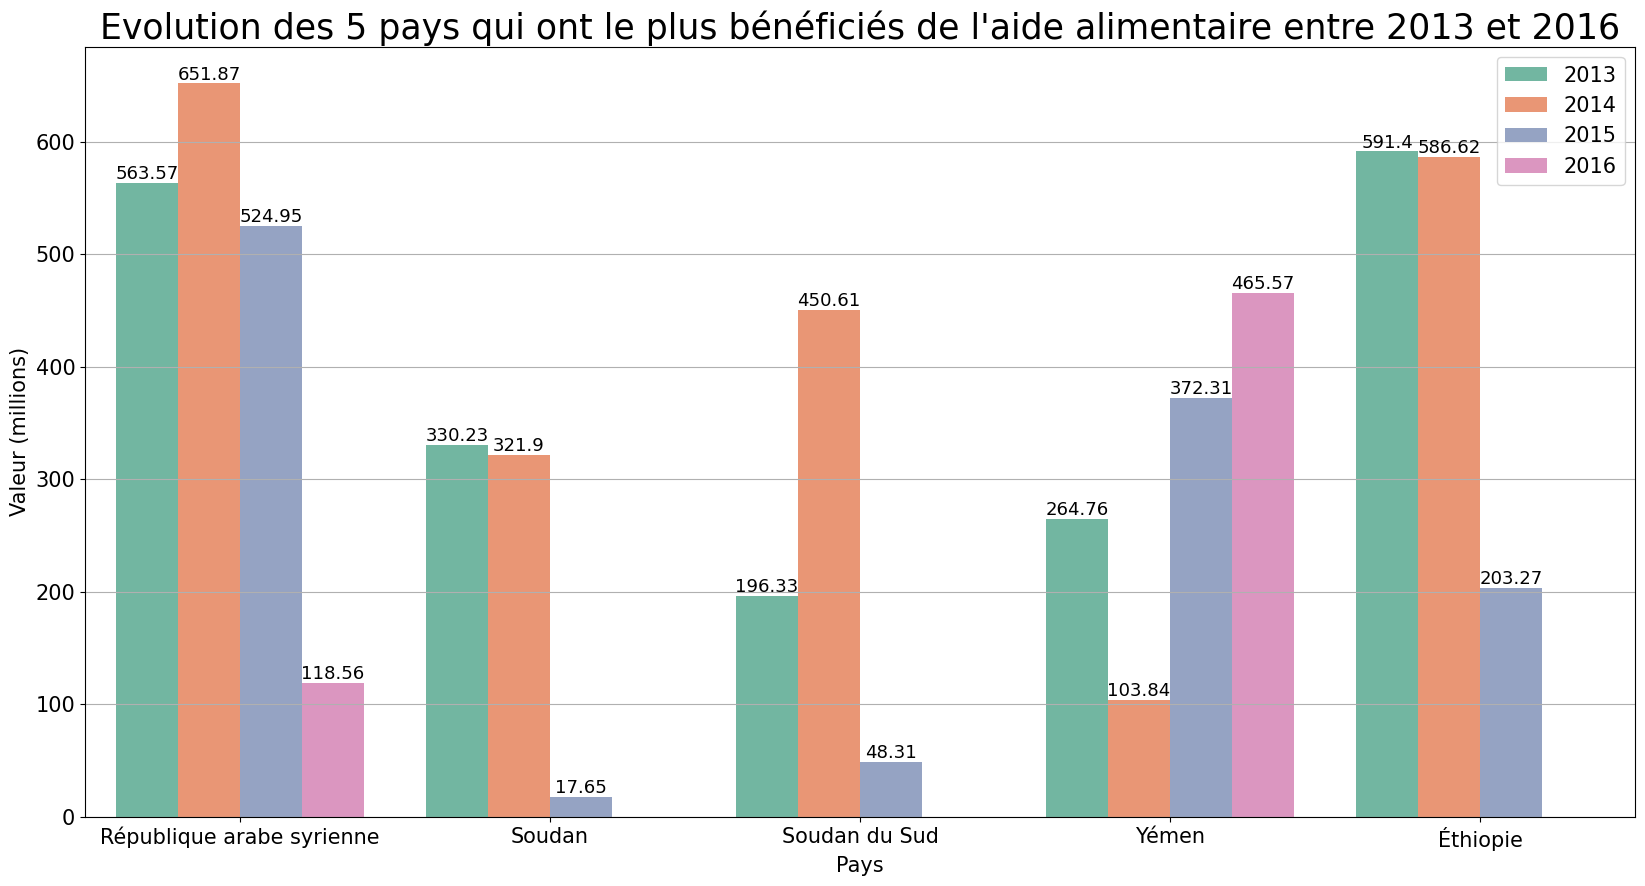

In [66]:
plt.figure(figsize=(20, 10))
graph_evolution_aide = sns.barplot(data=benefits_2013_2016_années_cinq_pays, x='Zone', y='Valeur (millions)', hue='Année')
sns.set_palette('Set2')
plt.title("Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016", size = 25)
plt.xlabel('Pays', size = 15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Valeur (millions)', size=15)
plt.grid(axis='y')

sns.move_legend(graph_evolution_aide, "upper right")
graph_evolution_aide.legend(fontsize=15)


for i in graph_evolution_aide.containers:
    graph_evolution_aide.bar_label(i, fontsize=13)
    
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [67]:
#Calcul de la disponibilité en kcal par personne par jour par pays
kcal_jour_pays_list = ['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']
kcal_jour_pays = dispo_alimentaire.groupby(['Zone'])[kcal_jour_pays_list].sum()
kcal_jour_pays.reset_index()

C:\Users\floss\AppData\Local\Temp\ipykernel_22996\265972400.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kcal_jour_pays = dispo_alimentaire.groupby(['Zone'])[kcal_jour_pays_list].sum()


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [68]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
moins_dispo = kcal_jour_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10).reset_index()


C:\Users\floss\AppData\Local\Temp\ipykernel_22996\245166955.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph_moins_dispo = sns.barplot(data=moins_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y="Zone", ci=None, estimator=sum, orient='h')


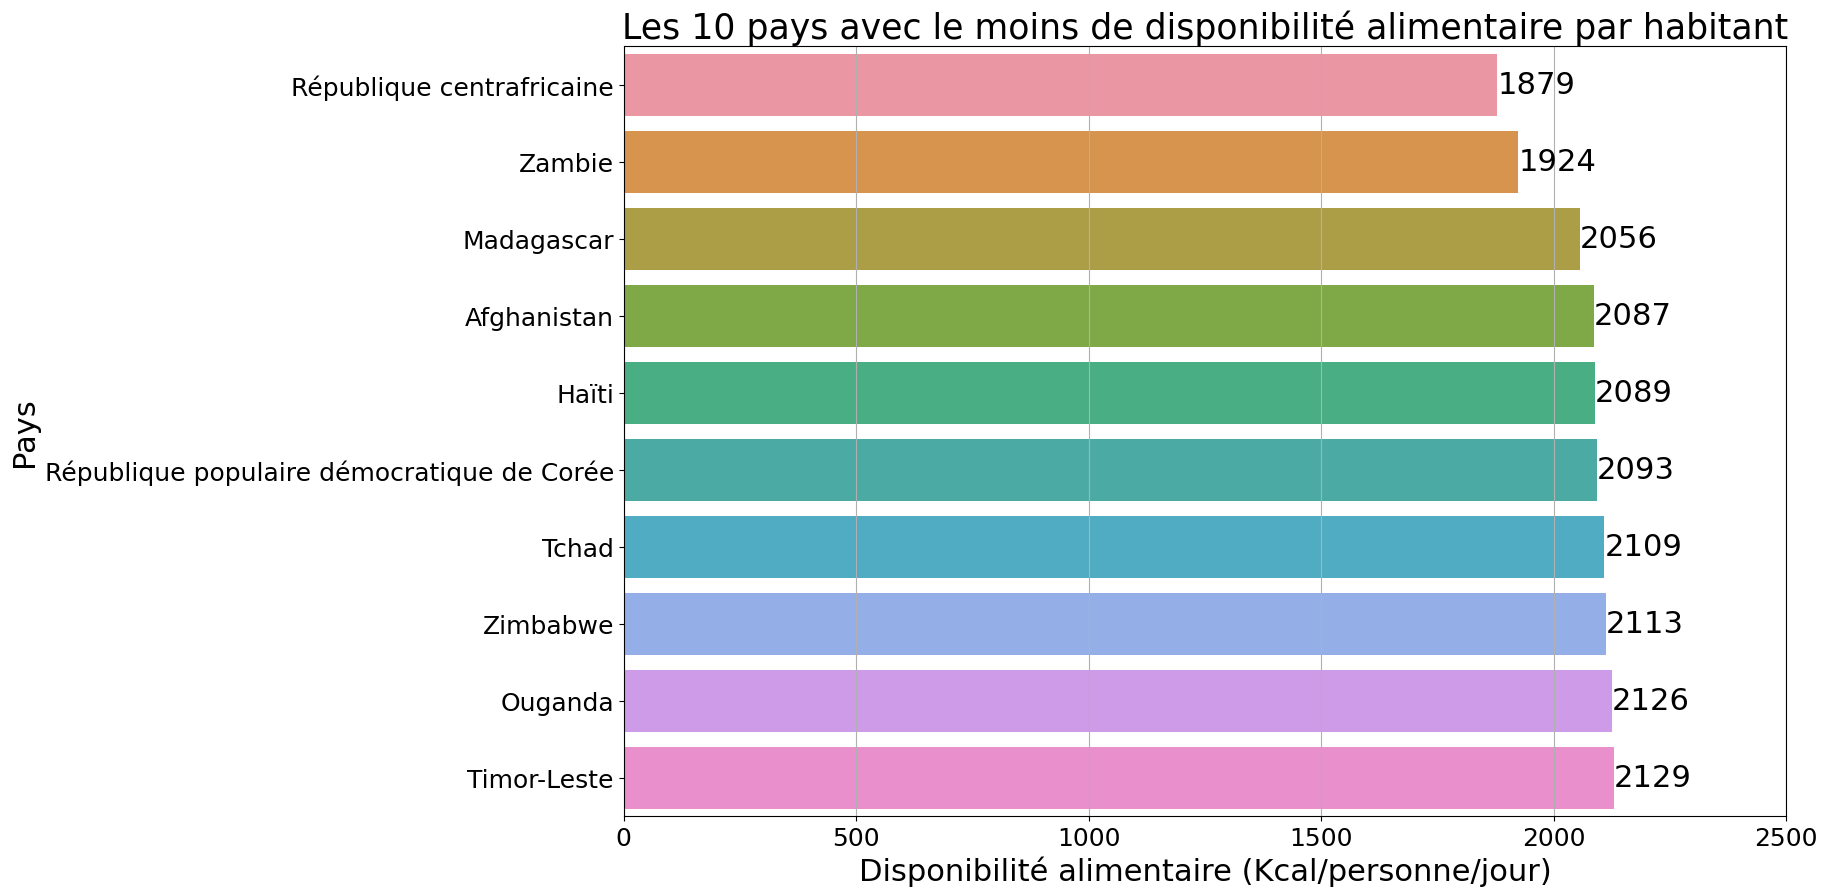

In [69]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(15, 10))
graph_moins_dispo = sns.barplot(data=moins_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y="Zone", ci=None, estimator=sum, orient='h')
plt.title("Les 10 pays avec le moins de disponibilité alimentaire par habitant", size=25)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', size=22)
plt.xlim(0, 2000)
plt.xticks(fontsize=18)
plt.ylabel('Pays', size=22)
plt.yticks(fontsize=18)
plt.xlim(0,2500)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_moins_dispo.containers:
    graph_moins_dispo.bar_label(i, fontsize=22)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [70]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
plus_dispo = kcal_jour_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10).reset_index()

C:\Users\floss\AppData\Local\Temp\ipykernel_22996\3344780905.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph_plus_dispo = sns.barplot(data=plus_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y="Zone", ci=None, estimator=sum, orient='h')


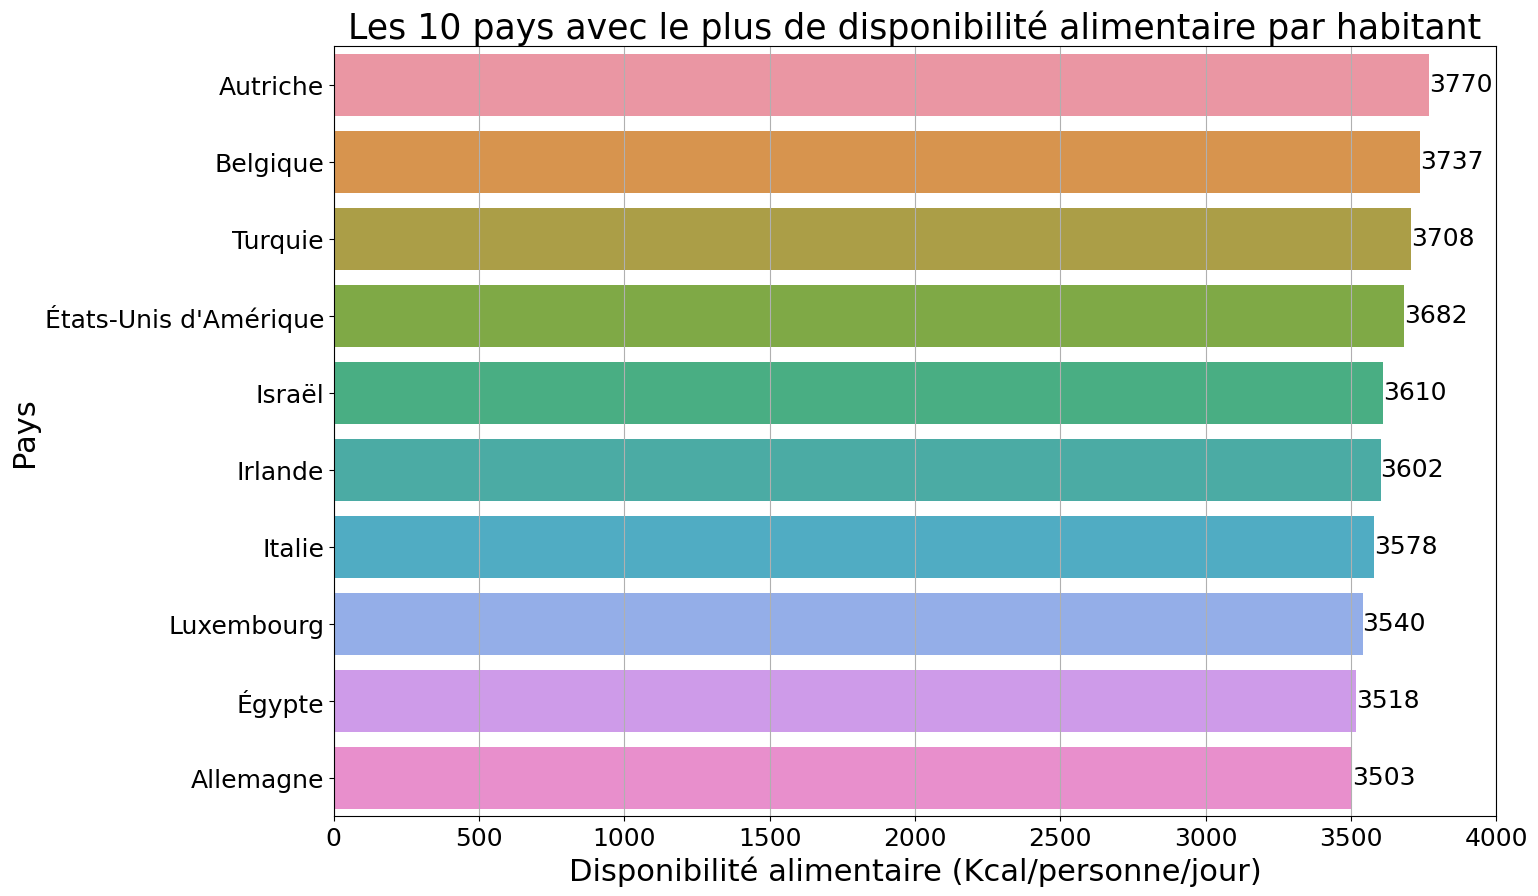

In [71]:
#(Catherine's notes - Bar chart example)
plt.figure(figsize=(15, 10))
graph_plus_dispo = sns.barplot(data=plus_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y="Zone", ci=None, estimator=sum, orient='h')
plt.title("Les 10 pays avec le plus de disponibilité alimentaire par habitant", size=25)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', size=22)
plt.xticks(fontsize=18)
plt.ylabel('Pays', size=22)
plt.yticks(fontsize=18)
plt.xlim(0,4000)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_plus_dispo.containers:
    graph_plus_dispo.bar_label(i, fontsize=18)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [72]:
#création d'un dataframe avec uniquement la Thaïlande 
Thailande = population_sousnutrition_2017.loc[population_sousnutrition_2017['Zone']=='Thaïlande', :]
Thailande.reset_index()
display(Thailande)

,Zone,Année_x,Population,Année_y,sous_nutrition,pourcentage_sousnutrition
6688,Thaïlande,2017,69209810.0,2016-2018,6200000.0,8.958268


In [73]:
#Calcul de la sous nutrition en Thaïlande

print(round(Thailande.iloc[0,5], 2), "% de la population thaïlandaise est sous-alimentée.")

8.96 % de la population thaïlandaise est sous-alimentée.


In [74]:
# On calcule la proportion exportée en fonction de la proportion
Thailande_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Zone']=='Thaïlande') & (dispo_alimentaire['Produit']=='Manioc'), :]
proportion_manioc= ((Thailande_manioc['Exportations - Quantité']/Thailande_manioc['Production'])*100).reset_index()
print('Production de manioc =', Thailande_manioc['Production'].sum(), 'kg')
print('-')
print('Exportations de manioc =', Thailande_manioc['Exportations - Quantité'].sum(), 'kg')
print('-')
print('La proportion de manioc exportée en fonction de la production est', round(proportion_manioc.iloc[0,1], 2), 'pourcent')

Production de manioc = 30228000000.0 kg
-
Exportations de manioc = 25214000000.0 kg
-
La proportion de manioc exportée en fonction de la production est 83.41 pourcent


In [75]:
Disponibilité_théorique= ((Thailande_manioc['Disponibilité alimentaire (Kcal/personne/jour)'].sum()/16.59)*100)
print('Disponibilité théorique =', round(Disponibilité_théorique, 2))

Disponibilité théorique = 241.11


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [76]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Pourcentage de sous nutrition par disponibilité alimentaire</h3>
</div>

In [77]:
#Fusion de 2 colonnes
sous_nutrition_calories_dispo = pd.merge(sous_nutrition_sorted, kcal_jour_pays, on='Zone')


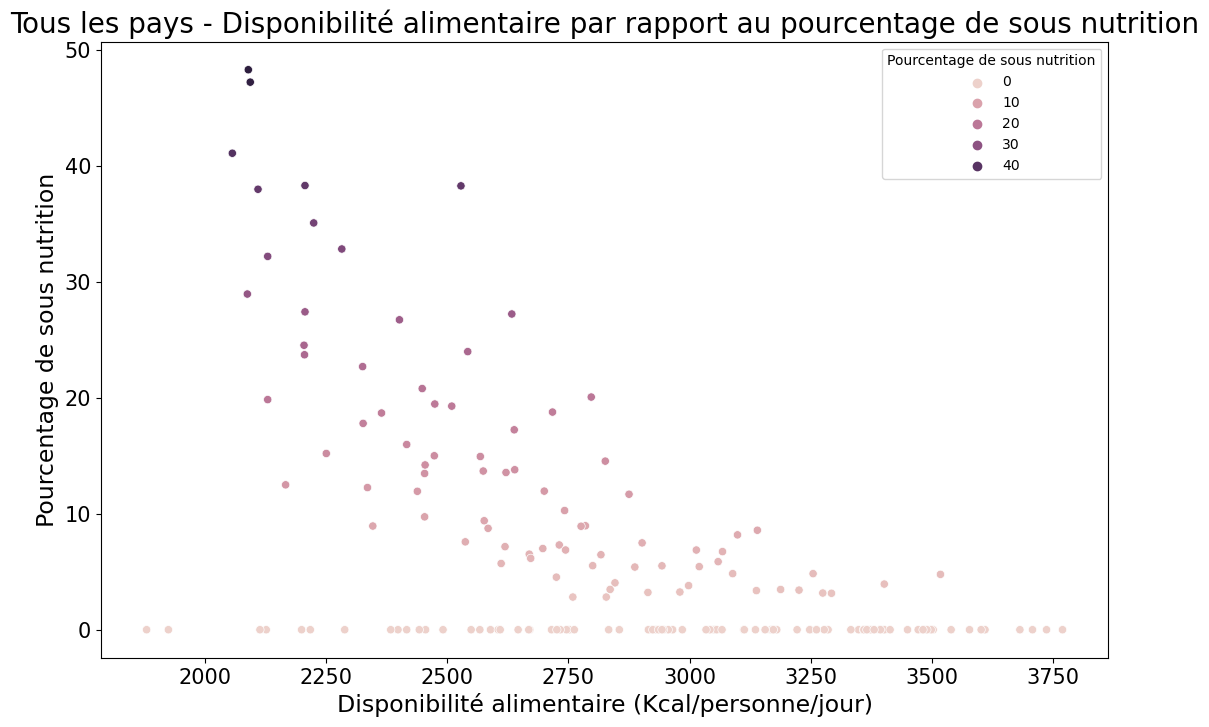

In [78]:
#Pourcentage de sous nutrition par disponibilité alimentaire (Kcal/personne/jour)
plt.figure(figsize=(13,8))
sns.scatterplot(data=sous_nutrition_calories_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y='pourcentage_sousnutrition', hue='pourcentage_sousnutrition')
plt.title('Tous les pays - Disponibilité alimentaire par rapport au pourcentage de sous nutrition', size=20)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', size=17)
plt.ylabel('Pourcentage de sous nutrition', size=17)
plt.yticks(size=15)
plt.xticks(size=15)
plt.legend(title='Pourcentage de sous nutrition', loc='upper right')

In [79]:
sous_nutrition_calories_dispo

,Zone,Année_x,Population,Année_y,sous_nutrition,pourcentage_sousnutrition,Disponibilité alimentaire (Kcal/personne/jour)
0,Haïti,2017,10982366.0,2016-2018,5300000.0,48.259182,2089.0
1,République populaire démocratique de Corée,2017,25429825.0,2016-2018,12000000.0,47.188685,2093.0
2,Madagascar,2017,25570512.0,2016-2018,10500000.0,41.062924,2056.0
3,Libéria,2017,4702226.0,2016-2018,1800000.0,38.279742,2206.0
4,Lesotho,2017,2091534.0,2016-2018,800000.0,38.249438,2528.0
...,...,...,...,...,...,...,...
167,Guyana,2017,775222.0,2016-2018,0.0,0.000000,2762.0
168,Hongrie,2017,9729823.0,2016-2018,0.0,0.000000,3034.0
169,Îles Salomon,2017,636039.0,2016-2018,0.0,0.000000,2383.0
170,Irlande,2017,4753279.0,2016-2018,0.0,0.000000,3602.0


In [ ]:
#50 pire pays par disponibilité alimentaire
pire_sorted = (sous_nutrition_calories_dispo.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')).reset_index()
pire_50 = pire_sorted.head(50)
#Nombre de pays avec des valeurs nulles pour leurs niveaux de sous-nutrition
print(pire_50['pourcentage_sousnutrition'].value_counts()[0.000000], "des 50 pays (",(15/50)*100, "% ) avec les disponibilités alimentaires les plus faibles ont des valeurs nulles pour leurs niveaux de sous nutrition") 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Pourcentage de disponibilité perdu pour les 10 pays avec le plus et le moins de disponibilité alimentaire</h3>
</div>

In [ ]:
#Création d'une liste des 10 pays avec le moins de disponibilité alimentaire
moins_dispo_list = moins_dispo['Zone'].values.tolist()
#Création d'une dataframe avec pertes et disponibilité intérieure
pertes_moins_dispo = dispo_alimentaire[dispo_alimentaire.Zone.isin(moins_dispo_list)]
pertes_moins_dispo = pertes_moins_dispo.reset_index()
pertes_moins_dispo = pertes_moins_dispo.groupby('Zone')[['Pertes', 'Disponibilité intérieure']].sum()
pertes_moins_dispo = pertes_moins_dispo.reset_index()
#Création d'une colonne avec pourcentage de disponibilité perdu
pertes_moins_dispo['Pourcentage de disponibilité perdu'] = round((pertes_moins_dispo['Pertes']/pertes_moins_dispo['Disponibilité intérieure'])*100,2)
pertes_moins_dispo = pertes_moins_dispo.sort_values('Pourcentage de disponibilité perdu', ascending=False)
#Affichage de DataFrame
display(pertes_moins_dispo)

In [ ]:
#Création d'une liste des 10 pays avec le moins de disponibilité alimentaire
plus_dispo_list = plus_dispo['Zone'].values.tolist()
#Création d'une dataframe avec pertes et disponibilité intérieure
pertes_plus_dispo = dispo_alimentaire[dispo_alimentaire.Zone.isin(plus_dispo_list)]
pertes_plus_dispo = pertes_plus_dispo.reset_index()
pertes_plus_dispo = pertes_plus_dispo.groupby('Zone')[['Pertes', 'Disponibilité intérieure']].sum()
pertes_plus_dispo = pertes_plus_dispo.reset_index()
#Création d'une colonne avec pourcentage de disponibilité perdu
pertes_plus_dispo['Pourcentage de disponibilité perdu'] = round((pertes_plus_dispo['Pertes']/pertes_plus_dispo['Disponibilité intérieure'])*100,2)
pertes_plus_dispo = pertes_plus_dispo.sort_values('Pourcentage de disponibilité perdu', ascending=False)
#Affichage du DataFrame
display(pertes_plus_dispo)

In [ ]:
print('Le pourcentage moyen de pertes de nourriture disponible pour les 10 pays avec le plus de disponibilité alimentaire est', round(pertes_plus_dispo['Pourcentage de disponibilité perdu'].mean(),2), '%')
print('-')
print('Le pourcentage moyen de pertes de nourriture disponible pour les 10 pays avec le moins de disponibilité alimentaire est',round(pertes_moins_dispo['Pourcentage de disponibilité perdu'].mean(),2), '%')
print('-')
print('Cela signifie que les 10 pays avec le moins de disponibilité alimentaire perdent', round((5.75/3.08)*100,2)-100, '% de plus de leur nourriture disponible que les 10 pays avec le plus de disponibilité alimentaire')

In [ ]:
#Graphique - Pertes purs les pays avec le moins de disponibilité alimentaire
plt.figure(figsize=(15, 5))
graph_plus_dispo = sns.barplot(data=pertes_moins_dispo, x='Pourcentage de disponibilité perdu', y="Zone", ci=None, estimator=sum, orient='h')
plt.title("% de disponibilité perdu pour les 10 pays avec le moins de disponibilité alimentaire", size=25)
plt.xlabel('Pourcentage de disponibilité perdu', size=22)
plt.xticks(fontsize=18)
plt.ylabel('Pays', size=22)
plt.yticks(fontsize=18)
plt.xlim(0,12)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_plus_dispo.containers:
    graph_plus_dispo.bar_label(i, fontsize=18)

In [ ]:
#Graphique - Pertes purs les pays avec le plus de disponibilité alimentaire
plt.figure(figsize=(15, 5))
graph_plus_dispo = sns.barplot(data=pertes_plus_dispo, x='Pourcentage de disponibilité perdu', y="Zone", ci=None, estimator=sum, orient='h')
plt.title("% de disponibilité perdu pour les 10 pays avec le plus de disponibilité alimentaire", size=25)
plt.xlabel('Pourcentage de disponibilité perdu', size=22)
plt.xticks(fontsize=18)
plt.ylabel('Pays', size=22)
plt.yticks(fontsize=18)
plt.xlim(0,12)
plt.grid(axis='x')
sns.set_palette('Set2')

for i in graph_plus_dispo.containers:
    graph_plus_dispo.bar_label(i, fontsize=18)